# Code showing How To Capture Samples From RTL-SDR

Simple loop run on my Linux laptop capturing samples for later analysis

In [8]:
from rtlsdr import RtlSdr
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime
import pandas as pd

In [9]:
#initialize the SDR driver. This is pip installable
sdr = RtlSdr()

In [10]:
# configure device
sdr.sample_rate = 2.048e6  # Hz
sdr.center_freq = 30e6     # Hz
#sdr.freq_correction = 0   # PPM
sdr.gain = 25 # Little bit of trail and error here.. You don't want auto gain!


In [11]:
#Grab some samples This is about as many as I could get without an error
samps = sdr.read_samples(32500*256)

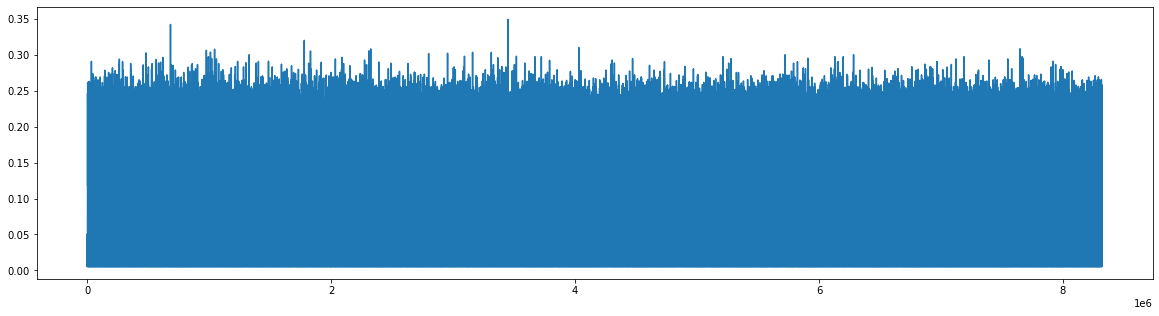

In [12]:
#Lets see what we have!
myf = plt.figure(figsize=[20,5])
plt.plot(np.abs(samps))
#plt.xlim([0, 1000e-6])

In [13]:
#Add a time array
dt = 1/ sdr.sample_rate

In [14]:
xtime = np.arange(len(samps))* dt

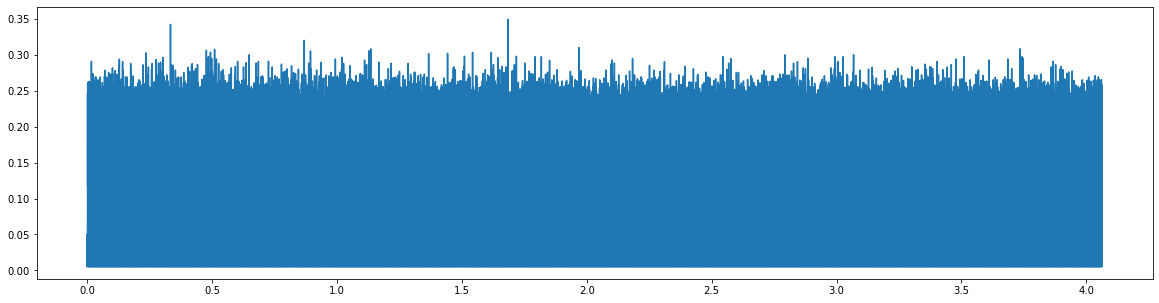

In [15]:
myf = plt.figure(figsize=[20,5])
plt.plot(xtime, np.abs(samps))
#plt.xlim([2000e-6, 12100e-6])

Ok! Here is the very simple code for monitoring.. Lazy implimentation. Eventually this would be good as an async module. Very simple: Grab sample. If the Max of the signal is >0.45 (noise is ~ .3) trigger an event and save data

In [19]:
lightmeup = []
times = []
gdat = []
for i in range(40000):
    current = np.datetime64(datetime.datetime.utcnow())
    samps = sdr.read_samples(32500*256)
    maxme =  np.abs(samps).max()
    meanme = np.abs(samps).mean()
    sdme = np.abs(samps).std()
    ts = pd.to_datetime(str(current))
    fmt = ts.strftime('%y%m%d_%H%M_%S')
    fname = fmt+'_'+ '{:.4f}'.format(maxme).replace('.','p') + '.npy'
    gdat.append({'time': current, 'max': maxme, 'mean': meanme, 'stddev': sdme})
    if maxme > 0.45:
        lightmeup.append({'time': current, 'sig' : samps})
        np.save('/home/scollis/data/event_'+fname, {'time': current, 'sig' : samps})
        print(fmt, ' ', maxme, ' ', meanme, ' ', sdme)
        
    

200719_1454_17   0.4980546546935379   0.0786204329972117   0.042575328201126264
200719_1552_16   0.45897433419132133   0.07845223159774581   0.04246392307671499
200719_1601_15   0.45398826427389477   0.07869620312293567   0.042587333624239096
200719_1602_19   0.5370401746363067   0.07835026518495615   0.042423421372668406
200719_1604_05   0.7914382296535658   0.0787818088700463   0.04263963522254503
200719_1608_38   0.45195121422388806   0.07852141721200821   0.042494028399983445
200719_1609_52   0.4507245651198308   0.07842533712616406   0.042445480905426644
200719_1611_37   0.46970505359240305   0.07849474344779156   0.04250211772451977
200719_1612_36   0.4909641042214664   0.0783970965705704   0.04243612911669952
200719_1612_50   0.5092908428685496   0.07854349768588013   0.042518684641248874
200719_1613_08   0.45195121422388806   0.07869749403183345   0.04259913449386001
200719_1617_01   0.5073545988416607   0.07940046448267696   0.04302047825665706
200719_1617_15   0.4905880785567

KeyboardInterrupt: 

In [ ]:
np.save('/home/scollis/data/events1.npy', lightmeup)